In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

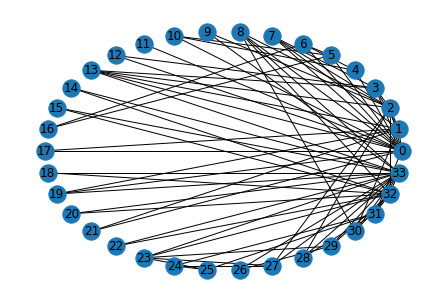

In [2]:
g = nx.karate_club_graph()
nx.draw_circular(g, with_labels=True)
plt.show()

In [3]:
A = nx.to_numpy_array(g)
D = np.diag(A.sum(axis=1))
L = D - A
# Get eigen-values (l) and -vectors (x)
eigval, eigvec = np.linalg.eig(L)
eigval.shape, eigvec.shape

((34,), (34, 34))

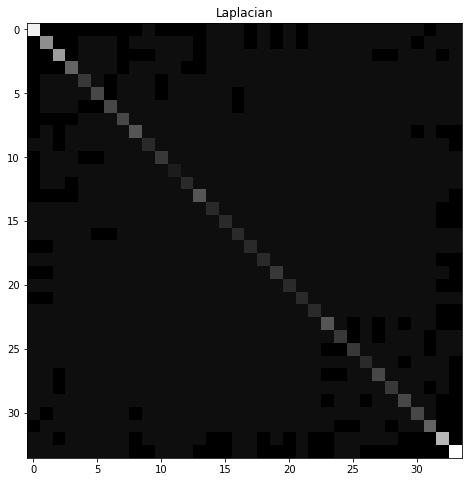

In [4]:
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(L, cmap='gray')
_ = ax.set(title='Laplacian')

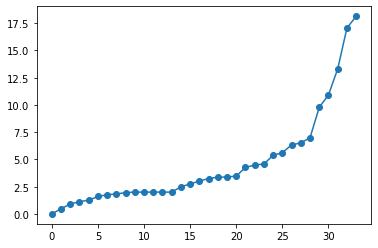

In [5]:
# sort by eigenvalue
idx = np.argsort(eigval)
eigval = eigval[idx]
eigvec = eigvec[:,idx]
plt.plot(eigval, marker='o') # 最小的特征值为0

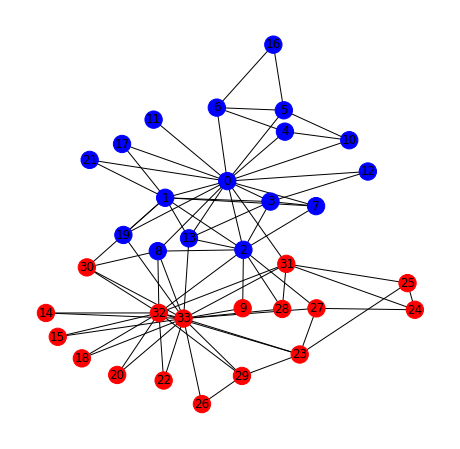

In [6]:
labels = np.array([(g.nodes[i]['club']!='Mr. Hi')*1 for i in range(A.shape[0])])
fig, ax = plt.subplots(figsize=(8,8))
nx.draw_kamada_kawai(g, with_labels=True, node_color=labels, cmap='bwr', ax=ax)

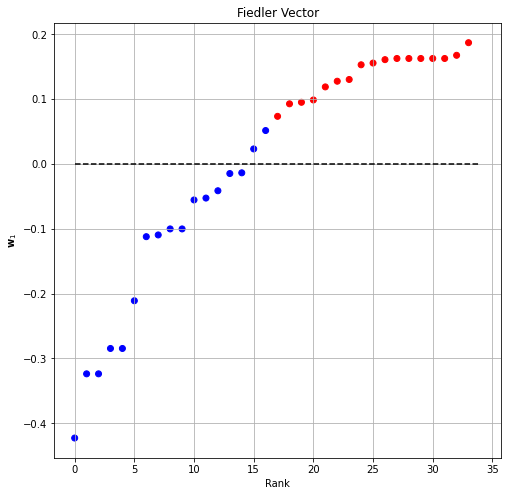

In [7]:
# Plot against 2nd and 3rd eigenvectors (1st is constant) and color-code by true label
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(x=range(eigvec.shape[1]), y=eigvec[np.argsort(eigvec[:,1]),1], c=labels[np.argsort(eigvec[:,1])], cmap='bwr')
ax.grid()
ax.hlines(0, 0, 34, linestyle='--', color='black')
_ = ax.set(xlabel='Rank', ylabel='$\mathbf{w}_1$', title='Fiedler Vector')

In [8]:
# Assign a cluster identity based on sign of Fiedler vector
cls = (eigvec[:,1]>0)*1

In [9]:
# Accuracy
(cls==labels).mean()

0.9411764705882353

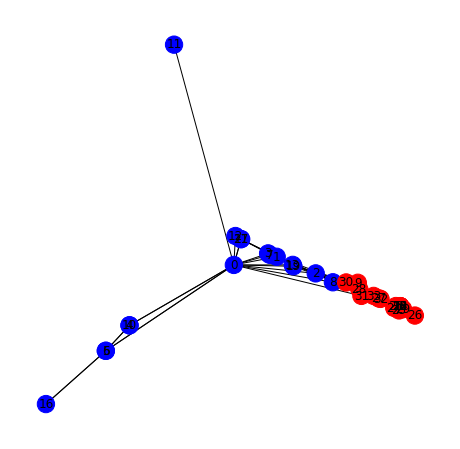

In [10]:
# Plot against 2nd and 3rd eigenvectors (1st is constant) and color-code by true label
pos_eigen = {i: eigvec[i,1:3] for i in range(eigvec.shape[0])} # 每个结点的位置
fig, ax = plt.subplots(figsize=(8,8))
nx.draw(g, pos=pos_eigen, with_labels=True, node_color=labels, cmap='bwr', ax=ax)

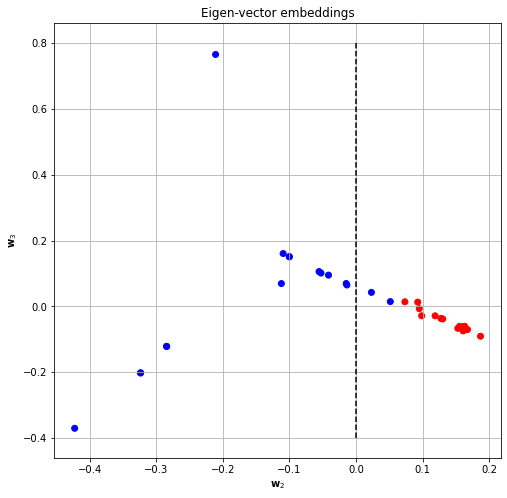

In [11]:
# Plot against 2nd and 3rd eigenvectors (1st is constant) and color-code by true label
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(x=eigvec[:,1], y=eigvec[:,2], c=labels, cmap='bwr')
ax.grid()
ax.vlines(0, -0.4, 0.8, linestyle='--', color='black')
_ = ax.set(xlabel='$\mathbf{w}_2$', ylabel='$\mathbf{w}_3$', title='Eigen-vector embeddings')